# Working With Data - Continuous Assessment 1 - Class Group: TU059 / TU060

## Ciaran Finnegan - Student No. d21124026

### November 2021

### What insights can various global socioecononmic and political datasets provide us in terms of explaining what makes a nation 'happy?


#### This project takes the World Happiness Report from Kaggle as the core dataset. 

A number of seperate global socioeconomic and political dataset are combined with this 'happiness' dataset to look for deeper insight of what actually may contribute to making a given country a 'happy' place.

## 

#### The CA follows a three-part structure.

Works begins with initial data loads, and additional tasks to create our combined dataset of 'happiness' attributes for individuals countries.

Exploration of the individual and merged datasets takes place to provide an overview of data strcuture and content.

The project ends with a deeper dive into whether we can isolate more easily understood factors that impact on whther a country can be deemed 'happy' or not.


### 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Seaborn" data-toc-modified-id="Seaborn-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Seaborn</a></span><ul class="toc-item"><li><span><a href="#Notebook-Modes" data-toc-modified-id="Notebook-Modes-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Notebook Modes</a></span></li><li><span><a href="#Dataset-Distribution" data-toc-modified-id="Dataset-Distribution-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Dataset Distribution</a></span></li><li><span><a href="#Categorical-Data" data-toc-modified-id="Categorical-Data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Categorical Data</a></span></li><li><span><a href="#Time-Series-Data" data-toc-modified-id="Time-Series-Data-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Time-Series Data</a></span></li></ul></li><li><span><a href="#Pandas-Plotting" data-toc-modified-id="Pandas-Plotting-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Pandas Plotting</a></span></li><li><span><a href="#Plotly" data-toc-modified-id="Plotly-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plotly</a></span><ul class="toc-item"><li><span><a href="#Transfer-Matplotlib-Figure-to-Plotly" data-toc-modified-id="Transfer-Matplotlib-Figure-to-Plotly-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Transfer Matplotlib Figure to Plotly</a></span></li></ul></li><li><span><a href="#Animation" data-toc-modified-id="Animation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Animation</a></span></li><li><span><a href="#Jupyter-Magic" data-toc-modified-id="Jupyter-Magic-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Jupyter Magic</a></span></li></ul></div>

# Part 1

## Import the piece/s of data and perform any cleaning and merging to produce a final dataframe.

Note: It is assumed that the matplotlib library has been installed on the user's machine before it is available for import.

```bash
> pip install matplotlib
```

In [1]:
# Load libraries...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

Set up some additional libraries for graphical presentations

#### Seaborn Library

In [3]:
# import and set Seaborn style
# notice how this will update Matplotlib style too
import seaborn as sns
sns.set(style="darkgrid")
sns.set_context("talk", font_scale=1)

### 

Start with a 2015 Kaggle File that contains a happiness score (range 1 - 10) for 155 countries around the world.

In [4]:
# Read file, located in same directory as the notebook, for World Happiness Index data
df_WorldHappinessIndex = pd.read_csv('World_Happiness_Index_In_2015.csv')


In [5]:
# Display basic file data for the initial Kaggle 'Gloabl Happiness' datatset
df_WorldHappinessIndex

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


#### 

To begin the process of building an augmented database on global nations 'happiness', the new dataset to load contains a comparison of GDP Per Capita and a Political Stability Index for individual countries over approximately the last 20 years.

The source of the dataset is the Our World in Data website - https://ourworldindata.org/

Our Kaggle dataset is only concerned with the year 2015 so we will be manipulating this GDP/Stability file to focus on just those entries.

In [6]:
# Read file, located in same directory as this notebook, for GDP/Political Stability data
df_GDPStateFragility = pd.read_csv('gdp-per-capita-vs-state-fragility.csv')

In [7]:
# Display basic dataframe information for GDP/Political Stability data
#df_GDPStateFragility

#### 

The next file to load is the 'Human Freedom Index' - https://www.openintro.org/data/index.php?data=hfi

This is a dataset sourced from the OpenIntro portal. Using the website's own description..."The Human Freedom Index is a report that attempts to summarize the idea of "freedom" through a bunch of different variables for many countries around the globe."

In [8]:
# Read file, located in same directory as this notebook, for Human Freedom Index data
df_HumanFreedomIndex = pd.read_csv('humanfreedomind.csv')

In [9]:
# Display basic dataframe information for Human Freedom Index data
df_HumanFreedomIndex.describe()

,year,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,pf_ss_disappearances_violent,pf_ss_disappearances_organized,pf_ss_disappearances_fatalities,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
count,1458.000000,880.000000,880.000000,880.000000,1378.000000,1378.000000,1369.000000,1378.000000,1279.000000,1378.000000,...,1283.000000,1357.000000,1368.000000,1374.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000
mean,2012.000000,5.589355,5.474770,5.044070,5.309641,7.412980,8.341855,9.519458,6.772869,9.584972,...,4.886192,7.698494,6.981858,6.317668,7.019782,6.785610,76.973149,6.993444,77.007983,2.490566
std,2.582875,2.080957,1.428494,1.724886,1.529310,2.832947,3.225902,1.744673,2.768983,1.559826,...,1.889168,1.728507,1.979200,1.230988,1.027625,0.883601,44.540142,1.025811,44.506549,1.119698
min,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.009841,2.483540,2.880000,1.000000,3.765827,1.000000,1.000000
25%,2010.000000,4.133333,4.549550,3.789724,4.131746,6.386978,10.000000,10.000000,5.000000,9.942607,...,3.433786,6.874687,6.368178,5.591851,6.429498,6.250000,38.000000,6.336685,39.000000,1.000000
50%,2012.000000,5.300000,5.300000,4.575189,4.910797,8.638278,10.000000,10.000000,7.500000,10.000000,...,4.418371,8.074161,7.466692,6.265234,7.082075,6.900000,77.000000,6.923840,76.000000,2.000000
75%,2014.000000,7.389499,6.410975,6.400000,6.513178,9.454402,10.000000,10.000000,10.000000,10.000000,...,6.227978,8.991882,8.209310,7.139718,7.720955,7.410000,115.000000,7.894660,115.000000,3.000000
max,2016.000000,9.700000,8.773533,8.719848,8.723094,9.926568,10.000000,10.000000,10.000000,10.000000,...,9.623811,9.999638,9.865488,9.272600,9.439828,9.190000,162.000000,9.126313,162.000000,4.000000


In [10]:
df_HumanFreedomIndex.head(7)

,year,ISO_code,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
0,2016,ALB,Albania,Eastern Europe,6.661503,4.547244,4.666508,5.291752,8.920429,10.0,...,4.050196,7.324582,7.074366,6.705863,6.906901,7.54,34.0,7.568140,48.0,2.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,NaN,NaN,3.819566,9.456254,10.0,...,3.765515,8.523503,7.029528,5.676956,5.268992,4.99,159.0,5.135886,155.0,4.0
2,2016,AGO,Angola,Sub-Saharan Africa,NaN,NaN,NaN,3.451814,8.060260,5.0,...,1.945540,8.096776,6.782923,4.930271,5.518500,5.17,155.0,5.640662,142.0,4.0
3,2016,ARG,Argentina,Latin America & the Caribbean,7.098483,5.791960,4.343930,5.744791,7.622974,10.0,...,3.260044,5.253411,6.508295,5.535831,5.369019,4.84,160.0,6.469848,107.0,3.0
4,2016,ARM,Armenia,Caucasus & Central Asia,NaN,NaN,NaN,5.003205,8.808750,10.0,...,4.575152,9.319612,6.491481,6.797530,7.378069,7.57,29.0,7.241402,57.0,2.0
5,2016,AUS,Australia,Oceania,8.439110,7.525648,7.364078,7.776279,9.623538,10.0,...,7.238900,8.944387,8.823021,8.121631,8.465526,7.98,10.0,8.582219,4.0,1.0
6,2016,AUT,Austria,Western Europe,8.969832,7.872188,7.673227,8.171749,9.737912,10.0,...,6.418890,7.296116,8.531578,7.419870,7.371334,7.58,27.0,8.413474,16.0,1.0


The Human Freedom Index contains variables which we will correlate later against the Happiness Index, but it also contains the useful country attributes for ISO code and World Region that will be useful in later analysis.

#### 

#### 

The next dataset to load is the 'CIA Factbook Details on Countries'.

This is a collection of country-level statistics from the US Central Intelligence Agency (CIA). It contains a series of attributes that we will compare against the 'happiness index' to determine if we can find any meaningful and interesting correlations.


In [11]:
# Read file, located in same directory as this notebook, for CIA Factbook data
df_CIAFactbook = pd.read_csv('cia_factbook.csv')

In [12]:
# Display basic file data for the initial Kaggle 'Gloabl Happiness' datatset
df_CIAFactbook

,country,area,birth_rate,death_rate,infant_mortality_rate,internet_users,life_exp_at_birth,maternal_mortality_rate,net_migration_rate,population,population_growth_rate
0,Russia,17098242.0,11.87,13.83,7.08,40853000.0,70.16,34.0,1.69,1.424703e+08,-0.03
1,Canada,9984670.0,10.29,8.31,4.71,26960000.0,81.67,12.0,5.66,3.483484e+07,0.76
2,United States,9826675.0,13.42,8.15,6.17,245000000.0,79.56,21.0,2.45,3.188921e+08,0.77
3,China,9596960.0,12.17,7.44,14.79,389000000.0,75.15,37.0,-0.32,1.355693e+09,0.44
4,Brazil,8514877.0,14.72,6.54,19.21,75982000.0,73.28,56.0,-0.15,2.026568e+08,0.80
...,...,...,...,...,...,...,...,...,...,...,...
254,Bouvet Island,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
255,Palmyra Atoll,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
256,Akrotiri,123.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
257,European Union,NaN,NaN,NaN,4.33,NaN,80.02,NaN,NaN,5.114348e+08,NaN


# 

Part 2 of this report will delve into all the datasets in more detail but for now let's generate some basic graphs of the data loaded to confirm some basic details.


First: A quick look at the top and bottom of the Kaggle dataset 'happiness' index..

<AxesSubplot:ylabel='Country'>

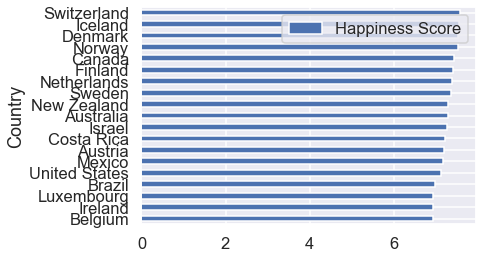

In [13]:
# Vertical Bar Chart of top nations in happiness index
# The 'Top 20' cut off allows 'Ireland' to be included in graph
top_20 = df_WorldHappinessIndex[df_WorldHappinessIndex["Happiness Rank"] < 20] 

# Plot horizontal bar chart with Matplotlib
top_20.sort_values("Happiness Score",ascending=True).plot.barh(x="Country", y="Happiness Score")

<AxesSubplot:ylabel='Country'>

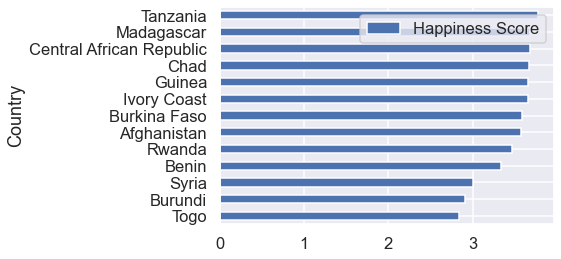

In [14]:
# Vertical Bar Chart of bottom nations in happiness index
# The bottom 10 are sufficient for this graph
bottom_10 = df_WorldHappinessIndex[df_WorldHappinessIndex["Happiness Rank"] > 145] 

# Plot horizontal bar chart with Matplotlib
bottom_10.sort_values("Happiness Score",ascending=True).plot.barh(x="Country", y="Happiness Score")

#### 

Second: A brief overview of the GDP/State Fragility data

In [15]:
# Some code here...

#### 

Third: A quick look at the structure of the 'Human Freedom' index..

In [16]:
# Some code here..
# sns.pairplot(df_HumanFreedomIndex, hue='region')

####  

Fourth: A quick look at the structure of the 'CIA Country Factbook' index..

####  

## Clean Up Datasets
### There are some missing data attributes and issus with some of the data content which need to be addressed before we can create a merged custom 'happiness' dataset with which to generate the interesting/insightful visualisations.

Kaggle Happiness: The assumption is the our initial dataset, which is the Kaggle happiness index, is clean and complete but some basic checks are performed here.  

To improve the later vizualisations columns will be remaned in each dataframe to emhance understanding/presentation.

In [17]:
df_WorldHappinessIndex.rename(columns={'Economy (GDP per Capita)':'GDP per Capita',
                        'Health (Life Expectancy)':'Life Expectancy',             
                        'Trust (Government Corruption)':'Trust in Gov'},inplace=True)

In [18]:
# Checking for null values in Kaggle Happiness dataset
[print('Any Null Values in the Kaggle 2015 Happiness Dataframe?','\n' ,df_WorldHappinessIndex.isnull().any())]

Any Null Values in the Kaggle 2015 Happiness Dataframe? 
 Country              False
Region               False
Happiness Rank       False
Happiness Score      False
Standard Error       False
GDP per Capita       False
Family               False
Life Expectancy      False
Freedom              False
Trust in Gov         False
Generosity           False
Dystopia Residual    False
dtype: bool


[None]

In [19]:
## Although it is an unlikely scenario - a quick check is run to see if any duplicate entires exist
[print('Numbers of duplicated rows in the Kaggle 2015 Happiness Dataframe?','\n' ,df_WorldHappinessIndex.duplicated().sum())]

Numbers of duplicated rows in the Kaggle 2015 Happiness Dataframe? 
 0


[None]

The 2015 Kaggle dataset has no missing data and is ready for us to proceed.

#### 

GDP/Political Fragility: Even a general visual inspection of the dataset overview in the earlier section of this report will show that there are data gaps in this dataset.

We only need the 2015 data so our first step is to filter out this information and then assess the data quality.

In [20]:
## Filter the dataset to extract only the 2015 data rows from the GDP/Political State Fragility data

In [21]:
df_GDPStateFragility_2015 = df_GDPStateFragility[df_GDPStateFragility['Year'] == 2015]

In [22]:
## Rename Columns - to improve data understanding
df_GDPStateFragility_2015.rename(columns={'Entity':'Country', 'Code':'ISO_Country_Cd', 
                        'GDP per capita, PPP (constant 2017 international $)':'GDP per capita', 
                        'Fragile States Index - ffp_fsi':'Political Fragility',
                        'Total population (Gapminder, HYDE & UN)':'Population'},inplace=True)

In [23]:
## check dataset structure again
df_GDPStateFragility_2015

,Country,ISO_Country_Cd,Year,GDP per capita,Political Fragility,Population,Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
14,Afghanistan,AFG,2015,2068.265904,107.9,3.441360e+07,Asia
512,Africa,NaN,2015,NaN,NaN,1.182439e+09,NaN
544,Africa Eastern and Southern,NaN,2015,3549.480563,NaN,NaN,NaN
575,Africa Western and Central,NaN,2015,4202.057923,NaN,NaN,NaN
...,...,...,...,...,...,...,...
56598,Yugoslavia,OWID_YGS,2015,NaN,NaN,NaN,Europe
56624,Zambia,ZMB,2015,3443.553254,86.3,1.587937e+07,Africa
56858,Zanzibar,OWID_ZAN,2015,NaN,NaN,NaN,Africa
56884,Zimbabwe,ZWE,2015,3198.982129,100.5,1.381464e+07,Africa


We will be using a later dataset for 'Regional' global breakdowns, as our immediate concern is only for data rows with valid country codes. The rows with no ISO codes will be checked and dropped from this 2015 GDP/Political Fragility dataset.

In [24]:
## Filer out tthe 2015 GDP/Political Fragility dataframe to look at rows with missing ISO Country Codes 

In [25]:
df_temp = df_GDPStateFragility_2015.loc[df_GDPStateFragility_2015["ISO_Country_Cd"].isnull()]

In [26]:
#df_temp

In [27]:
# Rows and Columns
df_temp.shape

(54, 7)

In [28]:
df_GDPStateFragility_2015 = df_GDPStateFragility_2015.loc[df_GDPStateFragility_2015["ISO_Country_Cd"].notnull()]

In [29]:
df_GDPStateFragility_2015

,Country,ISO_Country_Cd,Year,GDP per capita,Political Fragility,Population,Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
14,Afghanistan,AFG,2015,2068.265904,107.9,34413603.0,Asia
581,Akrotiri and Dhekelia,OWID_AKD,2015,NaN,NaN,NaN,Asia
607,Albania,ALB,2015,11878.488093,61.2,2890524.0,Europe
866,Algeria,DZA,2015,11696.965229,78.3,39728020.0,Africa
...,...,...,...,...,...,...,...
56598,Yugoslavia,OWID_YGS,2015,NaN,NaN,NaN,Europe
56624,Zambia,ZMB,2015,3443.553254,86.3,15879370.0,Africa
56858,Zanzibar,OWID_ZAN,2015,NaN,NaN,NaN,Africa
56884,Zimbabwe,ZWE,2015,3198.982129,100.5,13814642.0,Africa


In [30]:
## Check for Null GDP values - can these also be removed?

In [31]:
df_temp2 = df_GDPStateFragility_2015.loc[df_GDPStateFragility_2015["Political Fragility"].isnull()]

In [32]:
df_temp2

,Country,ISO_Country_Cd,Year,GDP per capita,Political Fragility,Population,Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
581,Akrotiri and Dhekelia,OWID_AKD,2015,NaN,NaN,NaN,Asia
1207,American Samoa,ASM,2015,NaN,NaN,55806.0,Oceania
1466,Andorra,AND,2015,NaN,NaN,77993.0,Europe
1846,Anguilla,AIA,2015,NaN,NaN,14279.0,North America
...,...,...,...,...,...,...,...
56596,Yemen Arab Republic,OWID_YAR,2015,NaN,NaN,NaN,Asia
56597,Yemen People's Republic,OWID_YPR,2015,NaN,NaN,NaN,Asia
56598,Yugoslavia,OWID_YGS,2015,NaN,NaN,NaN,Europe
56858,Zanzibar,OWID_ZAN,2015,NaN,NaN,NaN,Africa


In [33]:
## Check for Null Political Fragility values - what is the impact of removing these?

In [34]:
df_GDPStateFragility_2015 = df_GDPStateFragility_2015.loc[df_GDPStateFragility_2015["Political Fragility"].notnull()]

In [35]:
df_GDPStateFragility_2015 

,Country,ISO_Country_Cd,Year,GDP per capita,Political Fragility,Population,Continent
14,Afghanistan,AFG,2015,2068.265904,107.9,34413603.0,Asia
607,Albania,ALB,2015,11878.488093,61.2,2890524.0,Europe
866,Algeria,DZA,2015,11696.965229,78.3,39728020.0,Africa
1498,Angola,AGO,2015,8036.410898,90.5,27884380.0,Africa
1879,Antigua and Barbuda,ATG,2015,18594.261624,56.2,93571.0,North America
...,...,...,...,...,...,...,...
55384,Venezuela,VEN,2015,16055.650000,81.6,30081827.0,South America
55657,Vietnam,VNM,2015,6438.259854,70.7,92677082.0,Asia
56348,Yemen,YEM,2015,824.120000,111.5,26497881.0,Asia
56624,Zambia,ZMB,2015,3443.553254,86.3,15879370.0,Africa


In [36]:
## Although it is an unlikely scenario - a quick check is run to see if any duplicate entires exist
[print('Numbers of duplicated rows in the State Fragility 2015 Dataframe?','\n' ,df_GDPStateFragility_2015.duplicated().sum())]

Numbers of duplicated rows in the State Fragility 2015 Dataframe? 
 0


[None]

In [37]:
## Rename Columns to improve data descriptions

In [38]:
# There will be some gaps on Political Fragility to be filled in later...

In [39]:
#df_HumanFreedomIndex


In [40]:
# Only select the four data attributes entries that we need (for the year 2015) from Human Freedon Index dataframe
df_FreedonTemp1 = df_HumanFreedomIndex.loc[(df_HumanFreedomIndex['year'] == 2015), 
                                           ["year","ISO_code",
                                           "countries","hf_score","hf_rank"]]

In [41]:
# Checking for null values in Human Freedon Index dataframe
[print('Any Null Values in the Human Freedon Index dataframe?','\n' ,df_FreedonTemp1.isnull().any())]

Any Null Values in the Human Freedon Index dataframe? 
 year         False
ISO_code     False
countries    False
hf_score      True
hf_rank       True
dtype: bool


[None]

In [42]:
#
df_FreedonTemp2a = df_HumanFreedomIndex.loc[(df_HumanFreedomIndex['year'] == 2015) 
                                           & df_HumanFreedomIndex["hf_rank"].isnull(), ["year","ISO_code",
                                           "countries","hf_score","hf_rank"]]
df_FreedonTemp2a.sort_values("hf_rank")

,year,ISO_code,countries,hf_score,hf_rank
174,2015,BLR,Belarus,NaN,NaN
231,2015,IRQ,Iraq,NaN,NaN
298,2015,SDN,Sudan,NaN,NaN


In [43]:
#
df_FreedonTemp2b = df_HumanFreedomIndex.loc[(df_HumanFreedomIndex['year'] == 2015) 
                                           & df_HumanFreedomIndex["hf_score"].isnull(), ["year","ISO_code",
                                           "countries","hf_score","hf_rank"]]
df_FreedonTemp2b.sort_values("hf_rank")

,year,ISO_code,countries,hf_score,hf_rank
174,2015,BLR,Belarus,NaN,NaN
231,2015,IRQ,Iraq,NaN,NaN
298,2015,SDN,Sudan,NaN,NaN


In [98]:
#set up dataframe to update missing Human Freedom Index scores
# BLR hf_score = 3.65 hf_rank = 160
# IRQ hf_score = 3.34 hf_rank = 161
# SDN hf_score = 3.32 hf_rank = 162
df_Cntry_To_Update_HF = pd.DataFrame({'ISO_code': ['BLR','IRQ','SDN'],
                   'hf_score': [3.65, 3.34, 3.32],
                   'hf_rank': [160, 161, 162]})


In [99]:
# Display new manually create dataset with missing 'Human Freedom' values
df_Cntry_To_Update_HF

,ISO_code,hf_score,hf_rank
0,BLR,3.65,160
1,IRQ,3.34,161
2,SDN,3.32,162


In [46]:
#loop through update values
for i in range(len(df_Cntry_To_Update_HF)):
    
    index = df_FreedonTemp1.index
    condition = df_FreedonTemp1[df_Cntry_To_Update_HF.columns[0]] == df_Cntry_To_Update_HF.iloc[i,0]
    cntry_index = index[condition]
    df_FreedonTemp1.at[cntry_index, df_Cntry_To_Update_HF.columns[1]] = df_Cntry_To_Update_HF.iloc[i,1]
    df_FreedonTemp1.at[cntry_index, df_Cntry_To_Update_HF.columns[2]] = df_Cntry_To_Update_HF.iloc[i,2]
    print("{}:Counter in Loop - Index in Temp = {} Country {}\n".format(i,cntry_index,df_Cntry_To_Update_HF.iloc[i,0]))


0:Counter in Loop - Index in Temp = Int64Index([174], dtype='int64') Country BLR

1:Counter in Loop - Index in Temp = Int64Index([231], dtype='int64') Country IRQ

2:Counter in Loop - Index in Temp = Int64Index([298], dtype='int64') Country SDN



In [49]:
df_FreedonTemp1.sort_values("hf_rank",ascending=False)

,year,ISO_code,countries,hf_score,hf_rank
298,2015,SDN,Sudan,3.320000,162.0
231,2015,IRQ,Iraq,3.340000,161.0
174,2015,BLR,Belarus,3.650000,160.0
303,2015,SYR,Syria,3.910826,159.0
321,2015,YEM,"Yemen, Rep.",4.203442,158.0
...,...,...,...,...,...
167,2015,AUS,Australia,8.607373,5.0
232,2015,IRL,Ireland,8.645525,4.0
302,2015,CHE,Switzerland,8.814458,3.0
225,2015,HKG,Hong Kong,8.857581,2.0


In [51]:
# Checking for null values in Human Freedon Index dataframe
[print('Any Null Values in the Human Freedon Index dataframe?','\n' ,df_FreedonTemp1.isnull().any())]

Any Null Values in the Human Freedon Index dataframe? 
 year         False
ISO_code     False
countries    False
hf_score     False
hf_rank      False
dtype: bool


[None]

In [52]:
## Although it is an unlikely scenario - a quick check is run to see if any duplicate entires exist
[print('Numbers of duplicated rows in the Human Freedon Index 2015 dataframe?','\n' ,df_FreedonTemp1.duplicated().sum())]

Numbers of duplicated rows in the Human Freedon Index 2015 dataframe? 
 0


[None]

#### 

#### 

## Merge Datasets
Using common country identifiers across the datasets, we combine the data into a single new dataframe for further visualisation.

# 

Join the Kaggle 2016 Happiness dataframe to the State Fragility dataframe

In [53]:
# Dataframe are slightly difference sizes - Check for differences

In [54]:
# Create Basis of merged dataframe - start with Kaggle Happiness 2015
#df_HappinessFactors_temp = df_WorldHappinessIndex.sort_values("Country",ascending=True).iloc[:, [0, 1, 2, 3, 9]]
df_HappinessFactors_temp = df_WorldHappinessIndex.iloc[:, [0, 1, 2, 3, 9]]
df_HappinessFactors_temp

,Country,Region,Happiness Rank,Happiness Score,Trust in Gov
0,Switzerland,Western Europe,1,7.587,0.41978
1,Iceland,Western Europe,2,7.561,0.14145
2,Denmark,Western Europe,3,7.527,0.48357
3,Norway,Western Europe,4,7.522,0.36503
4,Canada,North America,5,7.427,0.32957
...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.55191
154,Benin,Sub-Saharan Africa,155,3.340,0.08010
155,Syria,Middle East and Northern Africa,156,3.006,0.18906
156,Burundi,Sub-Saharan Africa,157,2.905,0.10062


In [55]:
# Next pick fields we want from State Fragility
#df_FragilityFactors_temp = df_GDPStateFragility_2015.sort_values("Country",ascending=True).iloc[:, [0, 1, 3, 4, 6]]
df_FragilityFactors_temp = df_GDPStateFragility_2015.iloc[:, [0, 1, 3, 4, 6]]
df_FragilityFactors_temp

,Country,ISO_Country_Cd,GDP per capita,Political Fragility,Continent
14,Afghanistan,AFG,2068.265904,107.9,Asia
607,Albania,ALB,11878.488093,61.2,Europe
866,Algeria,DZA,11696.965229,78.3,Africa
1498,Angola,AGO,8036.410898,90.5,Africa
1879,Antigua and Barbuda,ATG,18594.261624,56.2,North America
...,...,...,...,...,...
55384,Venezuela,VEN,16055.650000,81.6,South America
55657,Vietnam,VNM,6438.259854,70.7,Asia
56348,Yemen,YEM,824.120000,111.5,Asia
56624,Zambia,ZMB,3443.553254,86.3,Africa


In [56]:
#Trim text values
df_HappinessFactors_temp['Country'] = df_HappinessFactors_temp['Country'].str.strip()
df_FragilityFactors_temp['Country'] = df_FragilityFactors_temp['Country'].str.strip()


In [57]:
# Build our primary dataset on Happiness Factors per nation
# Join on the 2015 Kaggle table and only select country data from the Fragility dataframe for which we have a happiness score
# in the Kaggle dataframe
df_HappinessFactorsbyNation = pd.merge(df_HappinessFactors_temp, df_FragilityFactors_temp, how="left", on=["Country"])

#### The merging of these data frames provides our new primary 'happiness' dataframe with the following attributes;

```bash
 -  A More meaningful GDP data measure
 -  A 'Political Fragility' index. The higher the value, the less politically stable the county
```

The following data attribute will allow us to merge the additional datasets in this assignment;

```bash
 -  ISO Coutry Code
```


In [58]:
## Checking for null values in new Happiness Factors dataframe
[print('Any Null Values in the new Happiness Factors dataframe?','\n' ,df_HappinessFactorsbyNation.isnull().any())]

Any Null Values in the new Happiness Factors dataframe? 
 Country                False
Region                 False
Happiness Rank         False
Happiness Score        False
Trust in Gov           False
ISO_Country_Cd          True
GDP per capita          True
Political Fragility     True
Continent               True
dtype: bool


[None]

In [59]:
# Produce a table of countries missing an ISO Country Code
df_tempISO = df_HappinessFactorsbyNation[df_HappinessFactorsbyNation["ISO_Country_Cd"].isnull()]
df_tempISO

,Country,Region,Happiness Rank,Happiness Score,Trust in Gov,ISO_Country_Cd,GDP per capita,Political Fragility,Continent
30,Czech Republic,Central and Eastern Europe,31,6.505,0.02652,NaN,NaN,NaN,NaN
65,North Cyprus,Western Europe,66,5.695,0.14280,NaN,NaN,NaN,NaN
68,Kosovo,Central and Eastern Europe,69,5.589,0.04741,NaN,NaN,NaN,NaN
71,Hong Kong,Eastern Asia,72,5.474,0.37124,NaN,NaN,NaN,NaN
90,Somaliland region,Sub-Saharan Africa,91,5.057,0.39928,NaN,NaN,NaN,NaN
92,Macedonia,Central and Eastern Europe,93,5.007,0.05327,NaN,NaN,NaN,NaN
100,Swaziland,Sub-Saharan Africa,101,4.867,0.03060,NaN,NaN,NaN,NaN
107,Palestinian Territories,Middle East and Northern Africa,108,4.715,0.12905,NaN,NaN,NaN,NaN
119,Congo (Kinshasa),Sub-Saharan Africa,120,4.517,0.07625,NaN,NaN,NaN,NaN
138,Congo (Brazzaville),Sub-Saharan Africa,139,3.989,0.11686,NaN,NaN,NaN,NaN


Gaps in the data have been introduced by country data that is missing a 'Political Fragility' index, which also results in missing ISO Country Codes for some nations.

Looking at the nation list above, it was felt acceptable that these nations or political regions could be removed from our analysis.

The 'Czech Republic' is completely missing from the State Fragility dataset.

In [60]:
# Remove rows with no ISO Country Code
df_HappinessFactorsbyNation = df_HappinessFactorsbyNation.loc[df_HappinessFactorsbyNation["ISO_Country_Cd"].notnull()]

#### What about the rows in the 'State Fragility' dataframe for which there is no 'happiness' index?

There are rows row individual nations in the State Fragility dataframe that in the original Kaggle Happiness dataset. 

Below is a quick examination of the nation entries being excluded from our new primary Happiness dataframe.

In [61]:
# Check the countries in the State Fragile dataframe that do not exist in the Kaggle Happiness dataframe
df_NoHappinessIndexFragileStates = pd.merge(df_FragilityFactors_temp, df_HappinessFactors_temp,  how="left", on=["Country"], 
                 indicator=True)

# The 'indicator' flag allows us to isolate the nations that only exist in the State Fragility dataframe - those rows 
# are marked as 'left_only'
df_NoHappinessIndexFragileStates = df_NoHappinessIndexFragileStates[df_NoHappinessIndexFragileStates["_merge"] == 'left_only']

# Display country list 'missing' from the original Kaggle dataframe
df_NoHappinessIndexFragileStates

,Country,ISO_Country_Cd,GDP per capita,Political Fragility,Continent,Region,Happiness Rank,Happiness Score,Trust in Gov,_merge
4,Antigua and Barbuda,ATG,18594.261624,56.2,North America,NaN,NaN,NaN,NaN,left_only
10,Bahamas,BHS,35400.649466,51.6,North America,NaN,NaN,NaN,NaN,left_only
13,Barbados,BRB,15382.765689,49.0,North America,NaN,NaN,NaN,NaN,left_only
16,Belize,BLZ,7358.582292,66.0,North America,NaN,NaN,NaN,NaN,left_only
23,Brunei,BRN,63147.483490,62.0,Asia,NaN,NaN,NaN,NaN,left_only
30,Cape Verde,CPV,6266.881779,71.5,Africa,NaN,NaN,NaN,NaN,left_only
37,Congo,COG,5227.934277,92.2,Africa,NaN,NaN,NaN,NaN,left_only
39,Cote d'Ivoire,CIV,4417.150215,97.9,Africa,NaN,NaN,NaN,NaN,left_only
41,Cuba,CUB,NaN,66.3,North America,NaN,NaN,NaN,NaN,left_only
43,Czechia,CZE,36168.418555,40.8,Europe,NaN,NaN,NaN,NaN,left_only


Many of these entries are small island nations, which presumably were not included in the analysis that led to the creation 
of the origina; Kaggle dataset.

It is assumed, for the purposes of this assignment, that not including these countries in our visualisations will be acceptable. It will still be possible to determine useful data from our refined 'happiness' dataframe.

# 

In [62]:
#ISO_code,countries,hf_score,hf_rank

Run final check on structure / content of new primary datadframe for 'happiness' analysis.

In [63]:
## Checking for null values in new Happiness Factors dataframe
[print('Any Null Values in the new Happiness Factors dataframe?','\n' ,df_HappinessFactorsbyNation.isnull().any())]

Any Null Values in the new Happiness Factors dataframe? 
 Country                False
Region                 False
Happiness Rank         False
Happiness Score        False
Trust in Gov           False
ISO_Country_Cd         False
GDP per capita         False
Political Fragility    False
Continent              False
dtype: bool


[None]

In [64]:
## Although it is an unlikely scenario - a quick check is run to see if any duplicate entires exist
[print('Numbers of duplicated rows in the Happiness Factors Dataframe?','\n' ,df_HappinessFactorsbyNation.duplicated().sum())]

Numbers of duplicated rows in the Happiness Factors Dataframe? 
 0


[None]

#### The new Global Happiness Dataframe is now prepared and ready for visual analysis

In [65]:
# Check new Happiness Factors dataframe
df_HappinessFactorsbyNation

,Country,Region,Happiness Rank,Happiness Score,Trust in Gov,ISO_Country_Cd,GDP per capita,Political Fragility,Continent
0,Switzerland,Western Europe,1,7.587,0.41978,CHE,68025.920038,21.8,Europe
1,Iceland,Western Europe,2,7.561,0.14145,ISL,52142.932807,22.8,Europe
2,Denmark,Western Europe,3,7.527,0.48357,DNK,52892.646029,21.5,Europe
3,Norway,Western Europe,4,7.522,0.36503,NOR,62987.535863,21.2,Europe
4,Canada,North America,5,7.427,0.32957,CAN,47522.140667,23.8,North America
...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.55191,RWA,1889.158106,91.3,Africa
154,Benin,Sub-Saharan Africa,155,3.340,0.08010,BEN,2945.970221,78.9,Africa
155,Syria,Middle East and Northern Africa,156,3.006,0.18906,SYR,11606.454800,110.8,Asia
156,Burundi,Sub-Saharan Africa,157,2.905,0.10062,BDI,825.205661,100.7,Africa


## 

# 

Join the initial Kaggle 'Happiness' dataset to the human freedom index

In [66]:
#df_FreedonTemp = df_HumanFreedomIndex[]

## 

Join the CIA Country details dataframe

# 

# Seaborn

## Notebook Modes
Use `matplotlib` magic to switch between `notebook` and `inline` mode.
`tk` for new external plotting windows.

In [67]:
# sample array from normal distribution
x = np.random.normal(size=100)

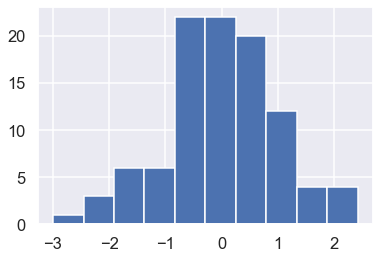

In [68]:
# plot histogram with Matplotlib
_ = plt.hist(x)

In [69]:
# interactive figure controls
%matplotlib notebook

<IPython.core.display.Javascript object>


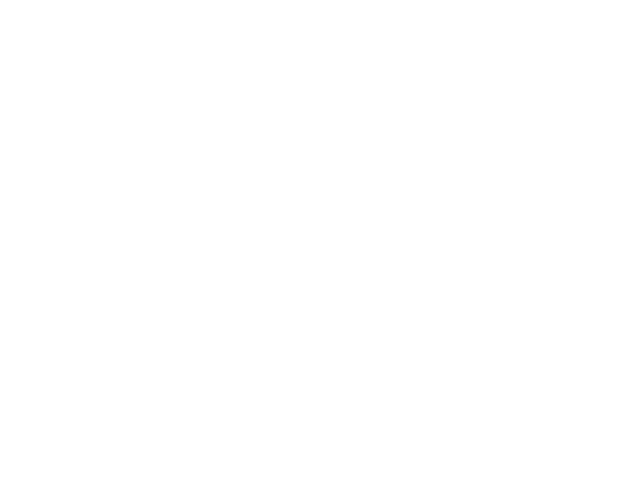

In [70]:
sns.distplot(np.random.normal(size=100))
plt.show()

In [71]:
# default to static image
%matplotlib inline

<AxesSubplot:>

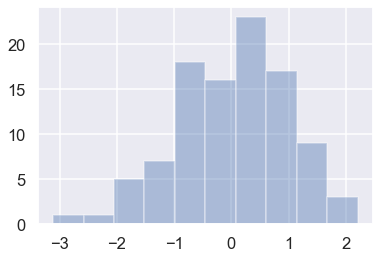

In [72]:
# plot histogram with seaborn
sns.distplot(np.random.normal(size=100), kde=False) # kde, rug

<AxesSubplot:>

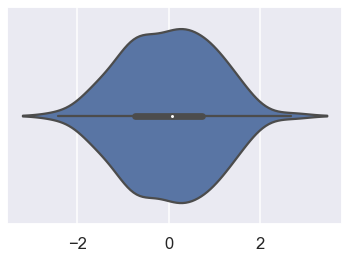

In [73]:
# boxplot, violinplot
sns.violinplot(np.random.normal(size=100))

## Dataset Distribution

In [74]:
# load iris dataset
# iris_df = sns.load_dataset('iris')
# iris_df.head()

In [75]:
# exaple pairplot for iris dataset
# notice we define what column to use for hue variations 
# sns.pairplot(iris_df, hue='species')

## Categorical Data

In [76]:
# load titanic dataset
#titanic_df = sns.load_dataset('titanic')
#titanic_df.head()

In [77]:
# exaple factorplot/catplot for titanic dataset
# sns.catplot(data=titanic_df, x='alive', col='deck', row='sex', 
#            kind='count')

In [78]:
# exaple factorplot/catplot for titanic dataset (bar, violin, swarm, box)
# sns.catplot(data=titanic_df, y='age', col='deck', kind='bar')

## Time-Series Data

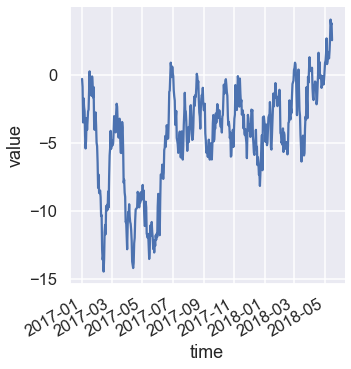

In [79]:
# create dummy time-series dataframe
df = pd.DataFrame(dict(time=pd.date_range("2017-1-1", periods=500),
                       value=np.random.randn(500).cumsum()))
# plot with seaborn
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

# Pandas Plotting

In [80]:
# direct plot from Pandas df
# iris_df.plot()

In [81]:
# compute and plot average attribute value for each species
# iris_df.groupby('species').agg(np.mean).plot(kind='bar')

# Plotly

In [82]:
# install plotly and cufflinks in current virtual-env

In [83]:
#pip install plotly
#pip install cufflinks

In [84]:
# Import libraries and set offline mode
#from plotly.offline import init_notebook_mode, plot, iplot
#import cufflinks as cf
#init_notebook_mode(connected=True)
#cf.go_offline(connected=True)
#enable_mpl_offline()

In [85]:
# Plot data via plotly
#import plotly.graph_objs as go

#data = [go.Histogram(x=x)]
#iplot(data)

In [86]:
# plot Pandas data via plotly
#iris_df.iplot()

In [87]:
# Export cufflink plot
#fig = iris_df.iplot(asFigure=True)
#plot(fig, filename="iris.html")

## Transfer Matplotlib Figure to Plotly

In [88]:
#import plotly.tools as tls

# create figure and plot in matplot
#mpl_fig = plt.figure()
#ax = mpl_fig.add_subplot(111)
#ax.hist(np.random.normal(size=100))

# convert and plot in plotly
#plotly_fig = tls.mpl_to_plotly(ax.figure)
#iplot(plotly_fig)

# Animation

<IPython.core.display.Javascript object>


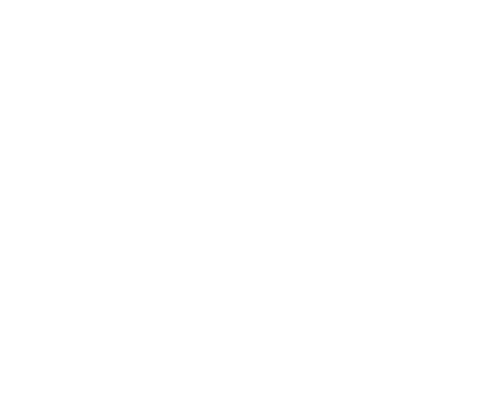

In [89]:
from matplotlib import animation

%matplotlib notebook

fig, ax = plt.subplots(dpi=100, figsize=(5, 4))
ax.set_xlim(0, 2)
ax.set_ylim(-2, 2)

line, = ax.plot([], [], lw=2)
#epoch_text = ax.text(0, 0, "Epoch 0")

def animate(i, line):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    #epoch_text.set_text("Epoch {}".format(i, cost))
    line.set_data(x, y)
    return line

ani = animation.FuncAnimation(fig, animate, 100, interval=10, repeat=True,
                             fargs=[line])

## 

# Part 2

## Carry out exploration of this dataframe to develop an overall understanding of the data.

## 

In [90]:
# default to static image
%matplotlib inline

In [91]:
df_count = df_HappinessFactorsbyNation[df_HappinessFactorsbyNation['Region'] == 'Western Europe']
df_count

,Country,Region,Happiness Rank,Happiness Score,Trust in Gov,ISO_Country_Cd,GDP per capita,Political Fragility,Continent
0,Switzerland,Western Europe,1,7.587,0.41978,CHE,68025.920038,21.8,Europe
1,Iceland,Western Europe,2,7.561,0.14145,ISL,52142.932807,22.8,Europe
2,Denmark,Western Europe,3,7.527,0.48357,DNK,52892.646029,21.5,Europe
3,Norway,Western Europe,4,7.522,0.36503,NOR,62987.535863,21.2,Europe
5,Finland,Western Europe,6,7.406,0.41372,FIN,45072.590215,18.8,Europe
6,Netherlands,Western Europe,7,7.378,0.31814,NLD,52974.116220,28.2,Europe
7,Sweden,Western Europe,8,7.364,0.43844,SWE,50928.962976,22.6,Europe
12,Austria,Western Europe,13,7.200,0.18676,AUT,52798.099461,27.5,Europe
16,Luxembourg,Western Europe,17,6.946,0.37798,LUX,110446.086102,24.1,Europe
17,Ireland,Western Europe,18,6.940,0.28703,IRL,72251.153536,22.5,Europe


In [92]:
df_count.shape

(20, 9)

In [93]:
df_count = df_HappinessFactorsbyNation[df_HappinessFactorsbyNation['Region'] == 'Sub-Saharan Africa']
df_count

,Country,Region,Happiness Rank,Happiness Score,Trust in Gov,ISO_Country_Cd,GDP per capita,Political Fragility,Continent
70,Mauritius,Sub-Saharan Africa,71,5.477,0.07521,MUS,19897.475397,43.2,Africa
77,Nigeria,Sub-Saharan Africa,78,5.268,0.04030,NGA,5514.770273,103.5,Africa
84,Zambia,Sub-Saharan Africa,85,5.129,0.12468,ZMB,3443.553254,86.3,Africa
93,Mozambique,Sub-Saharan Africa,94,4.971,0.15603,MOZ,1262.613128,87.8,Africa
96,Lesotho,Sub-Saharan Africa,97,4.898,0.12504,LSO,2701.421855,80.9,Africa
112,South Africa,Sub-Saharan Africa,113,4.642,0.08884,ZAF,12840.035403,69.9,Africa
113,Ghana,Sub-Saharan Africa,114,4.633,0.04355,GHA,4662.303191,71.2,Africa
114,Zimbabwe,Sub-Saharan Africa,115,4.610,0.08079,ZWE,3198.982129,100.5,Africa
115,Liberia,Sub-Saharan Africa,116,4.571,0.06232,LBR,1580.479228,95.5,Africa
117,Sudan,Sub-Saharan Africa,118,4.550,0.14660,SDN,4187.862722,111.5,Africa


In [94]:
df_count.shape

(35, 9)

#### Present the number of countries in out reworked dataframe based on their global regions

<AxesSubplot:xlabel='Region'>

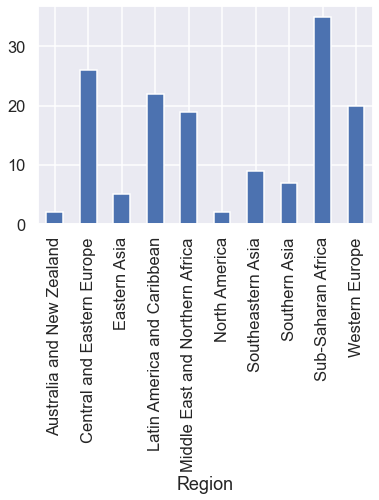

In [95]:
# Group the count of countries by region and present in a bar chart

df_HappinessFactorsbyNation.groupby('Region').size().plot(kind='bar')

## 

# Part 3

## Focus on a particular subset of the dataframe and drill down into it extracting details to answer a series of questions that are of interest to you as an analyst - Ideally the motivation for such questions would be framed within the context of a hypothetical use case scenario

# 

### Using our new dataframe, start with an analysis of how 'happiness; is impacted by GDP and Political Fragility 

<AxesSubplot:xlabel='Political Fragility', ylabel='Happiness Score'>

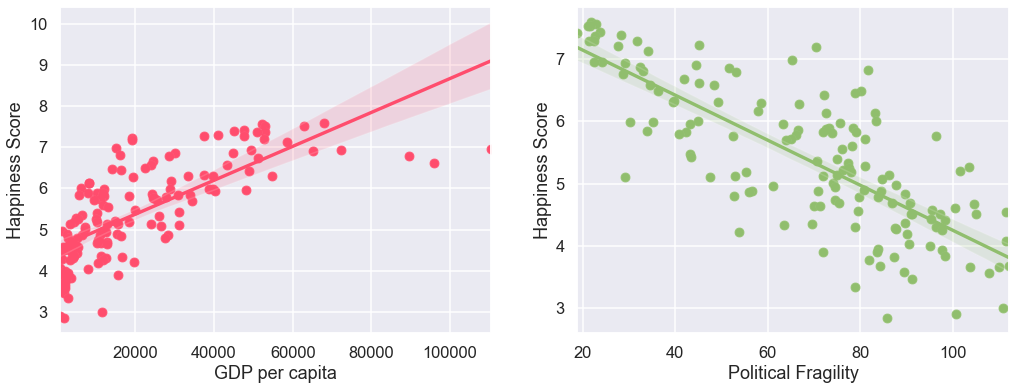

In [96]:
## Set up a scatter plot and line diagram to correlate 'happiness' with a nations GDP and political stability
fig, (ax1, ax2) = plt.subplots(figsize = (17,6), ncols=2, sharey=False)


## First compare GDP to the Kaggle 'Happiness Index'
sns.scatterplot(x=df_HappinessFactorsbyNation['GDP per capita'],
                y=df_HappinessFactorsbyNation['Happiness Score'],
                color='#ff4d6d',ax=ax1)

sns.regplot(x=df_HappinessFactorsbyNation['GDP per capita'],
            y=df_HappinessFactorsbyNation['Happiness Score'],
            ax=ax1,color='#ff4d6d')


## Then compare GDP to the Kaggle 'Happiness Index'
sns.scatterplot(x=df_HappinessFactorsbyNation['Political Fragility'],
                y=df_HappinessFactorsbyNation['Happiness Score'],
                ax=ax2,color='#90be6d')

sns.regplot(x=df_HappinessFactorsbyNation['Political Fragility'],
            y=df_HappinessFactorsbyNation['Happiness Score'],
            ax=ax2,color='#90be6d')


#### Although nations with a greater GDP are generally 'happier', there is a noticable pattern that after approximatelt 65K further increases in GDP do not make a increase the Happiness Core for a country.

#### However, as the political instability of a country increases (the Political Fragility index grows larger) there is a relatively impact on a nations 'happiness' - although there are some outliers.

# Jupyter Magic

In [97]:
%%html
<h1>Table</h1>
<table style="width:100%">
  <tr>
    <th>Firstname</th>
    <th>Lastname</th> 
    <th>Age</th>
  </tr>
  <tr>
    <td>Jill</td>
    <td>Smith</td> 
    <td>50</td>
  </tr>
  <tr>
    <td>Eve</td>
    <td>Jackson</td> 
    <td>94</td>
  </tr>
</table>

Firstname,Lastname,Age
Jill,Smith,50
Eve,Jackson,94
